In [1]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re

def atof(text):
    try:
        retval = float(text)
    except ValueError:
        retval = text
    return retval

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    float regex comes from https://stackoverflow.com/a/12643073/190597
    '''
    return [ atof(c) for c in re.split(r'[+-]?([0-9]+(?:[.][0-9]*)?|[.][0-9]+)', text) ]


In [2]:
all_files = glob.glob("data/*.csv")
all_files.sort(key=natural_keys)


li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0,sep=";")
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame[["NumberOfThreads", "NumberOfIterations","RunTime","HowFair"]] = frame[["NumberOfThreads", "NumberOfIterations","RunTime","HowFair"]].astype(float)


In [3]:
df_MSC_lock = frame[(frame['NameOfLock'] == 'MCS_lock')]
df_TTAS_lock = frame[(frame['NameOfLock'] == 'TTAS_lock')]
df_TAS_lock = frame[(frame['NameOfLock'] == 'TAS_lock')]
df_Array_lock = frame[(frame['NameOfLock'] == 'Array_lock')]
df_Ticket_lock = frame[(frame['NameOfLock'] == 'Ticket_lock')]
df_CLH_lock = frame[(frame['NameOfLock'] == 'CLH_lock')]
df_Array_lock_padded = frame[(frame['NameOfLock'] == 'Array_lock_padded')]
df_Native_lock = frame[(frame['NameOfLock'] == 'Native_lock')]
df_omp_critical = frame[(frame['NameOfLock'] == 'omp_critical')]
df_TAS_lock

,NameOfLock,NumberOfIterations,NumberOfThreads,RunTime,HowFair,Timevar
300,TAS_lock,10000.0,1.0,0.002456,0.000,0.000441
301,TAS_lock,10000.0,2.0,0.004742,5000.000,0.000410
302,TAS_lock,10000.0,3.0,0.007001,4711.920,0.000405
303,TAS_lock,10000.0,4.0,0.009976,3219.120,0.000533
304,TAS_lock,10000.0,5.0,0.012477,3878.660,0.000448
305,TAS_lock,10000.0,6.0,0.014911,3608.250,0.000436
306,TAS_lock,10000.0,7.0,0.017741,812.081,0.000506
307,TAS_lock,10000.0,8.0,0.020824,1166.870,0.000552
308,TAS_lock,10000.0,9.0,0.023929,1084.440,0.000556
309,TAS_lock,10000.0,10.0,0.027039,1637.960,0.000557


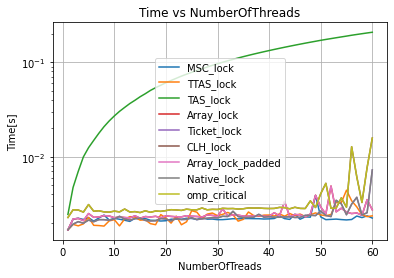

In [6]:
plt.semilogy(df_MSC_lock.NumberOfThreads,df_MSC_lock.RunTime,label = "MSC_lock")
plt.semilogy(df_TTAS_lock.NumberOfThreads,df_TTAS_lock.RunTime,label = "TTAS_lock")
plt.semilogy(df_TAS_lock.NumberOfThreads,df_TAS_lock.RunTime,label = "TAS_lock")
plt.semilogy(df_Array_lock.NumberOfThreads,df_Array_lock.RunTime,label = "Array_lock")
plt.semilogy(df_Ticket_lock.NumberOfThreads,df_Ticket_lock.RunTime,label = "Ticket_lock")
plt.semilogy(df_CLH_lock.NumberOfThreads,df_CLH_lock.RunTime,label = "CLH_lock")
plt.semilogy(df_Array_lock_padded.NumberOfThreads,df_Array_lock.RunTime,label = "Array_lock_padded")
plt.semilogy(df_Native_lock.NumberOfThreads,df_Ticket_lock.RunTime,label = "Native_lock")
plt.semilogy(df_omp_critical.NumberOfThreads,df_CLH_lock.RunTime,label = "omp_critical")
plt.xlabel("NumberOfTreads")
plt.ylabel("Time[s]")
plt.title("Time vs NumberOfThreads")
plt.grid()
plt.savefig("Time vs NumberOfThreads")
plt.legend()

<ErrorbarContainer object of 3 artists>

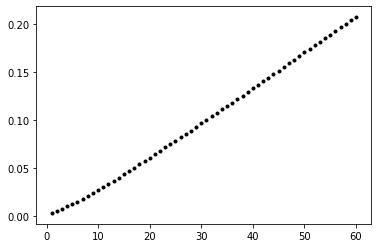

In [7]:
plt.errorbar(df_TAS_lock.NumberOfThreads, df_TAS_lock.RunTime, yerr=df_TAS_lock.Timevar, fmt='.k')

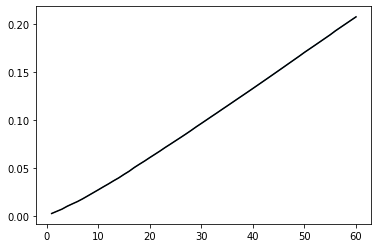

In [8]:
plt.plot(df_TAS_lock.NumberOfThreads, df_TAS_lock.RunTime, 'k-')
plt.fill_between(df_TAS_lock.NumberOfThreads, df_TAS_lock.RunTime-df_TAS_lock.Timevar, df_TAS_lock.RunTime+df_TAS_lock.Timevar)

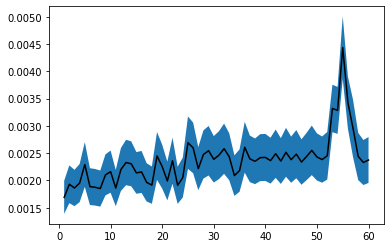

In [9]:
plt.plot(df_TTAS_lock.NumberOfThreads, df_TTAS_lock.RunTime, 'k-')
plt.fill_between(df_TTAS_lock.NumberOfThreads, df_TTAS_lock.RunTime-df_TTAS_lock.Timevar, df_TTAS_lock.RunTime+df_TTAS_lock.Timevar)

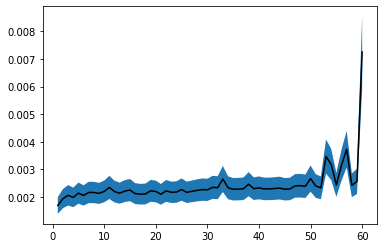

In [10]:
plt.plot(df_Ticket_lock.NumberOfThreads, df_Ticket_lock.RunTime, 'k-')
plt.fill_between(df_Ticket_lock.NumberOfThreads, df_Ticket_lock.RunTime-df_Ticket_lock.Timevar, df_Ticket_lock.RunTime+df_Ticket_lock.Timevar)

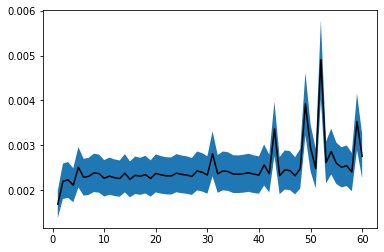

In [11]:
plt.plot(df_Array_lock.NumberOfThreads, df_Array_lock.RunTime, 'k-')
plt.fill_between(df_Array_lock.NumberOfThreads, df_Array_lock.RunTime-df_Array_lock.Timevar, df_Array_lock.RunTime+df_Array_lock.Timevar)